<a href="https://colab.research.google.com/github/Erssa001/ECGR_4105/blob/main/HW4_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import metrics

from scipy import stats
import seaborn as sns; sns.set()

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/My Drive/2023-2024/ECGR_4105/cancer.csv'
dataset = pd.DataFrame(pd.read_csv(file_path))

def binary_map(x):
    return x.map({'B':  0, 'M': 1})

dataset[['diagnosis']] = dataset[['diagnosis']].apply(binary_map).values

X = dataset.iloc[:, 2:32].values
Y = dataset.iloc[:, 1].values

dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


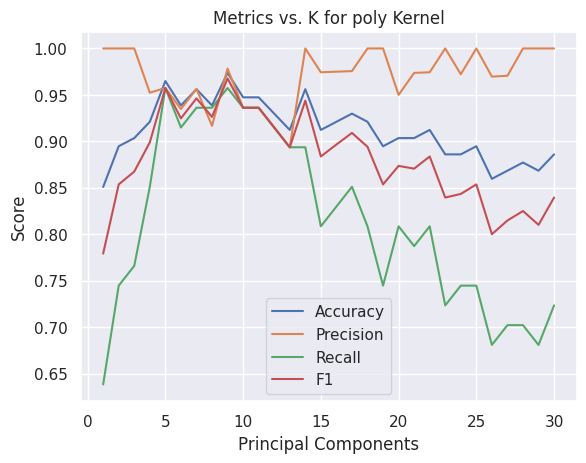

Best K =  9.0
Accuracy at best K =  0.9736842105263158


In [3]:
feat_to_use = len(X[0])
kernel='poly'
model = SVC(kernel=kernel, C=1E2)
K = np.zeros(feat_to_use)
P = np.zeros(feat_to_use)
R = np.zeros(feat_to_use)
Acc = np.zeros(feat_to_use)
F1 = np.zeros(feat_to_use)
for i in range(1, feat_to_use + 1):
  n_components = i
  pca = PCA(n_components=n_components)
  principalComponents = pca.fit_transform(X)
  #Data is split into trainng (80%) and validation sets (20%)
  X_train, X_test, Y_train, Y_test = train_test_split(principalComponents, Y, test_size = 0.20, random_state = 0)
  sc_X = StandardScaler()
  X_train = sc_X.fit_transform(X_train)
  X_test = sc_X.transform(X_test)
  model.fit(X_train, Y_train)
  # make predictions
  Y_pred = model.predict(X_test)
  # Next the scores for different validation metrics are displayed.
  Acc[i - 1] = metrics.accuracy_score(Y_test, Y_pred)
  P[i - 1] = metrics.precision_score(Y_test, Y_pred)
  R[i - 1] = metrics.recall_score(Y_test, Y_pred)
  F1[i - 1] = 2 * (P[i - 1] * R[i - 1]) / (P[i - 1] + R[i - 1])
  K[i - 1] = n_components

  # column_names = [f'principal component {i+1}' for i in range(n_components)]
  # principalDf = pd.DataFrame(data=principalComponents, columns=column_names)
  #principalDf.head()

# Plot the metrics
plt.plot(K, Acc, label='Accuracy')
plt.plot(K, P, label='Precision')
plt.plot(K, R, label='Recall')
plt.plot(K, F1, label='F1')

# Set labels and legend
plt.xlabel('Principal Components')
plt.ylabel('Score')
plt.legend()

# Set plot title
plt.title(f'Metrics vs. K for {kernel} Kernel')

# Show the plot
plt.show()

print("Best K = ", K[np.argmax(Acc)])
print("Accuracy at best K = ", max(Acc))